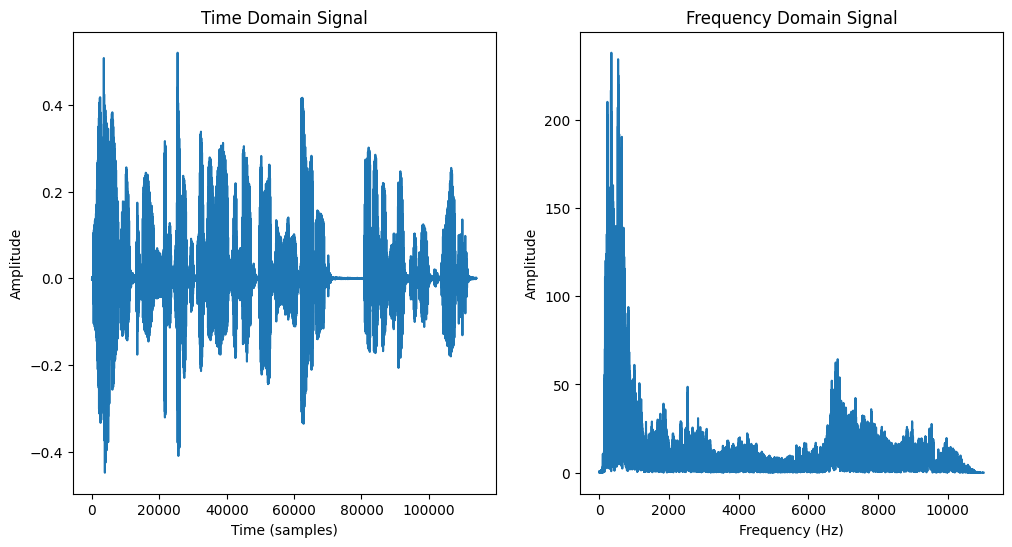

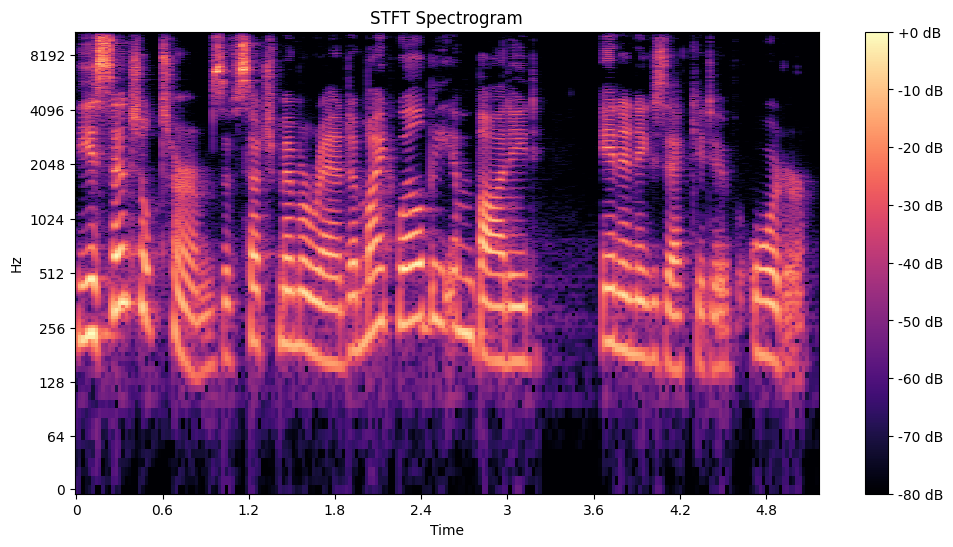

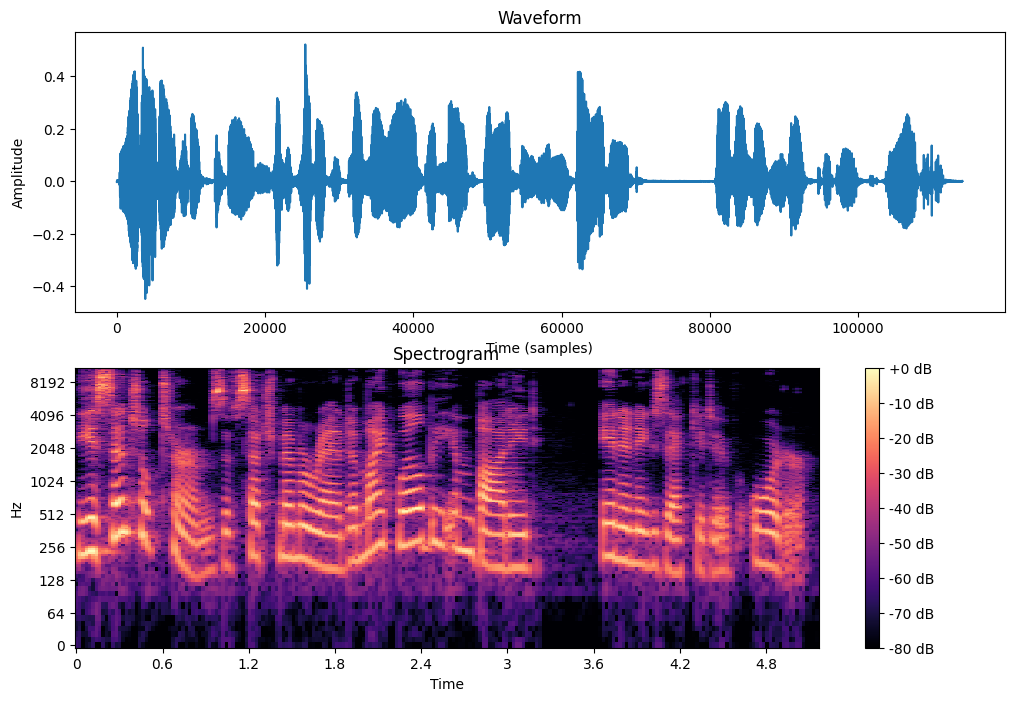

Energy Ratio (Low/High Frequency): 5.290


In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Loading a speech waveform from the LJ Speech dataset
filename = "/content/LJ050-0269.wav"
signal, sr = librosa.load(filename, sr=None)

# Experiment 1(A): Fourier Transform for Speech Signal Analysis

# Applying the Fast Fourier Transform (FFT) to obtain the frequency spectrum
fft_spectrum = np.abs(np.fft.fft(signal))

# Frequencies corresponding to the FFT spectrum components
frequencies = np.fft.fftfreq(len(fft_spectrum), 1/sr)

# Plotting the time-domain and frequency-domain representations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(signal)
plt.title('Time Domain Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.plot(frequencies[:len(frequencies)//2], fft_spectrum[:len(frequencies)//2])
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

# Experiment 1(B): Short-Time Fourier Transform (STFT) for Speech Analysis

# Computing the STFT
n_fft = 2048
hop_length = 512
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
db_stft = librosa.amplitude_to_db(np.abs(stft), ref=np.max)

# Plotting the spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(db_stft, sr=sr, x_axis='time', y_axis='log', hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Spectrogram')
plt.show()

# Experiment 2: Energy Distribution in Vowels and Consonants

# Short-Time Fourier Transform (STFT) parameters
n_fft = 2048
hop_length = 512

# Computing the STFT of the speech signal
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
stft_magnitude = np.abs(stft)

# Getting the frequencies corresponding to the STFT output
frequencies = librosa.fft_frequencies(sr=sr, n_fft=n_fft)

# Computing energy in specific frequency bands
low_freq_band = (frequencies > 300) & (frequencies <= 3000)
high_freq_band = (frequencies > 4000) & (frequencies <= 8000)

# Summing the energy in low and high frequency bands across all time frames
low_freq_energy = np.sum(stft_magnitude[low_freq_band]**2, axis=0)
high_freq_energy = np.sum(stft_magnitude[high_freq_band]**2, axis=0)

# Computing the energy ratio between vowels and consonants
energy_ratio = np.sum(low_freq_energy) / np.sum(high_freq_energy)

# Plotting the waveform and spectrogram
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(signal)
plt.title('Waveform')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(stft_magnitude, ref=np.max), sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

print(f"Energy Ratio (Low/High Frequency): {energy_ratio:.3f}")